In [1]:
#Import various modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

# **1. TRAINING DATA PRE-PROCESSING**

The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.   

As such, data pre-processing addresses:
- Assumptions about data shape
- Incorrect data types
- Outliers or errors
- Missing values
- Categorical variables

## **Data Load and its Shape**

In [2]:
#Data Load
full_data = pd.read_csv('/content/USA_Housing.csv')
full_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
# Data Info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Missing Data**  
 A heatmap will help better visualize what features as missing the most information.

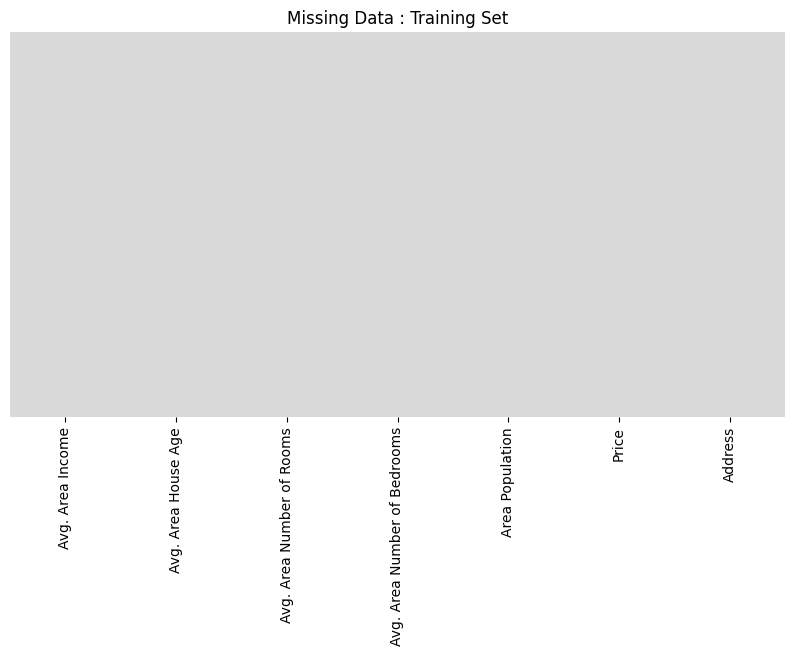

In [4]:
#Missing Data
sns.heatmap(full_data.isnull(),yticklabels=False,cbar=False,cmap='tab20c_r')
plt.title('Missing Data : Training Set')
plt.show()

In [5]:
#Remove Address feature
full_data.drop('Address', axis=1, inplace=True)

In [6]:
#Remove rows with missing data
full_data.dropna(inplace=True)

In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [8]:
#Numeric Summar Features
full_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# **2. GETTING MODEL READY**

Now that we've explored the data, it is time to get these features 'model ready'. Categorial features will need to be converted into 'dummy variables', otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [9]:
# Shape of train data
full_data.shape

(5000, 6)

Now the train data is prefect for a machine learning algorithm:
*   All the data is numeric
*   Everything is concatenated togather

# **3. OBJECTIVE 2: MACHINE LEARNING**
Next, I will feed these features into various classification algorithms to determine the best performance using a simple framework: **Split, Fit, Predict, Score It.**

## **Target Variable Splitting**
We will spilt the Full dataset into **Input** and **target** variables

Input is also called **Feature Variables**
Output referes to Target **variables**

In [10]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Price', axis = 1) #grabs everything else but 'Price'

# Create target variable
y = full_data['Price'] #y is the column we're trying to predict

# **Data Preprocessing**

In [14]:
from sklearn import preprocessing
x_pre_process = preprocessing.StandardScaler().fit(x)
x_pre_process

StandardScaler()

In [15]:
#transofr the input data
x_transform = x_pre_process.transform(x)
x_transform

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [17]:
print(x_transform.shape)

(5000, 5)


In [36]:
#Shape of y
print(y.shape)
y.head()

(5000,)


0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [37]:
# Use x and y variable to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = 0.10, random_state = 1)

# **1. Linear Regression**

## **Model Training**

In [38]:
#Fit
#Import model
from sklearn.linear_model import LinearRegression

#Create instentiate
Lin_reg = LinearRegression()

#Pass the training data into model and fit it
Lin_reg.fit(x_train, y_train)

LinearRegression()

# **Model Testing**

## **Class Prediction**

In [39]:
#Predict
y_pred = Lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(500,)
[1554683.5214399  1583563.24439528  941225.74026093  943645.05050714
 1182422.13103409  328801.82154785 1927836.21341998 1069153.56034445
 1650471.09661947 1073173.73634535  625424.71460166 1538374.13036006
 1631652.9247289  1052427.98639216  959014.31519697 1234206.9702727
 1429305.22944777  925549.79891021 1126241.93729671 1159272.38021256
 1295981.01672271 1864678.19351198 1182431.10145894 1191493.57355746
 1557481.81254847 1862564.76945657  813324.88451243 1063060.65771745
 1226156.79626916  659278.7795202   841633.35073089 1635760.74010405
  664805.32190952 1117024.80078667  799534.550374   1303687.59142732
 1147113.45373281 1348569.86939243 1033860.534031   1162323.80837825
 1413268.53943701 1308874.97935079 1578249.18647836 1300199.87406543
  846787.67223351  923146.16088842 1230070.83185333 1161447.51667952
 1422509.2038584  1334739.83601197 1571116.34224364  745448.4002769
  755057.34610782 1036162.37236739 1231514.2682073  1310043.25850097
 1542799.49392908 1074684.174

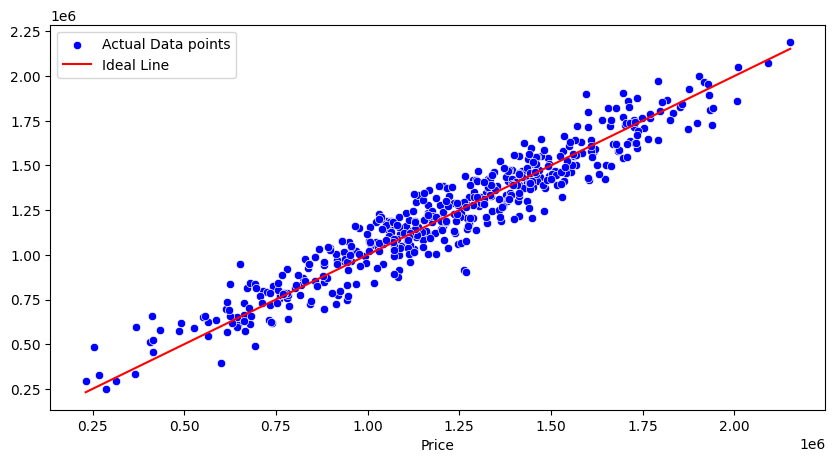

In [40]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [41]:
#Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

#Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
  print(f"{actual:14.2f} | {predicted:14.2f}")

Actual Values  |  Predicted Values
-----------------------------
    1413579.82 |     1554683.52
    1618721.14 |     1583563.24
     841392.49 |      941225.74
     881443.92 |      943645.05
    1174747.55 |     1182422.13
     266298.88 |      328801.82
    1877941.97 |     1927836.21
    1022408.90 |     1069153.56
    1766248.40 |     1650471.10
     949072.25 |     1073173.74
     565937.20 |      625424.71
    1437153.96 |     1538374.13
    1582605.54 |     1631652.92
    1009854.70 |     1052427.99
    1116351.75 |      959014.32
    1255736.41 |     1234206.97
    1504441.01 |     1429305.23
     837540.17 |      925549.80
    1096069.29 |     1126241.94
    1205962.99 |     1159272.38
    1130844.03 |     1295981.02
    1815920.45 |     1864678.19
    1023595.11 |     1182431.10
    1054304.17 |     1191493.57
    1399909.05 |     1557481.81
    1710612.03 |     1862564.77
     670063.02 |      813324.88
    1245785.05 |     1063060.66
    1168760.43 |     1226156.80
     41

## **Residual Analysis**
Residual analysis in linear regression is a way to check how well the model fits the data. It involves looking at the differences (residuals) between the actual data points and the predictions from the model.

In a good model, the residuals should be randomly scattered around zero on a plot. If there are patterns or a fan-like shape, it suggests the model may not be the best fit. Outliers, points far from the others, can also affect the model.

Residual analysis helps ensure the model's accuracy and whether it meets the assumptions of linear regression. If issues are found, adjustments to the model may be needed to improve its performance.

In [42]:
residual = actual- y_pred.reshape(-1)
print(residual)

[-5.29244088e+05 -5.58123810e+05  8.42136937e+04  8.17943834e+04
 -1.56982697e+05  6.96637612e+05 -9.02396779e+05 -4.37141264e+04
 -6.25031663e+05 -4.77343024e+04  4.00014719e+05 -5.12934696e+05
 -6.06213491e+05 -2.69885525e+04  6.64251187e+04 -2.08767536e+05
 -4.03865796e+05  9.98896350e+04 -1.00802503e+05 -1.33832946e+05
 -2.70541583e+05 -8.39238760e+05 -1.56991668e+05 -1.66054140e+05
 -5.32042379e+05 -8.37125336e+05  2.12114549e+05 -3.76212238e+04
 -2.00717362e+05  3.66160654e+05  1.83806083e+05 -6.10321306e+05
  3.60634112e+05 -9.15853669e+04  2.25904884e+05 -2.78248157e+05
 -1.21674020e+05 -3.23130435e+05 -8.42110010e+03 -1.36884374e+05
 -3.87829106e+05 -2.83435545e+05 -5.52809753e+05 -2.74760440e+05
  1.78651762e+05  1.02293273e+05 -2.04631398e+05 -1.36008083e+05
 -3.97069770e+05 -3.09300402e+05 -5.45676908e+05  2.79991034e+05
  2.70382088e+05 -1.07229384e+04 -2.06074834e+05 -2.84603825e+05
 -5.17360060e+05 -4.92447408e+04 -2.34430753e+04 -5.60722773e+05
 -4.12269276e+05 -9.32814

<Axes: ylabel='Density'>

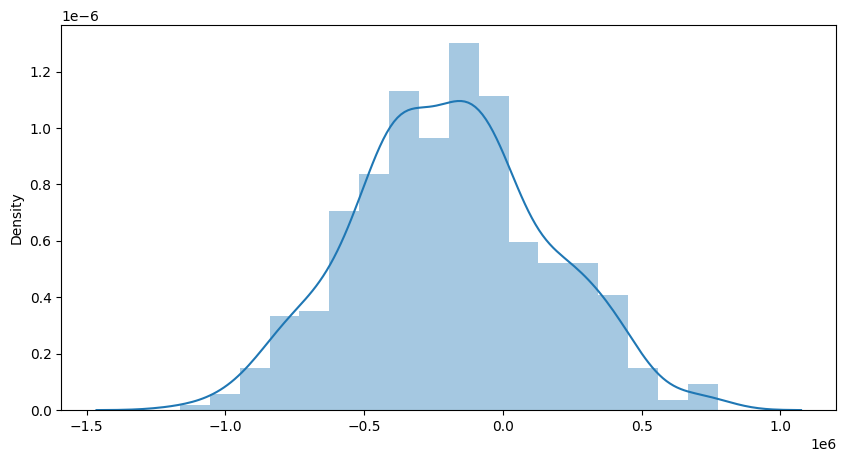

In [43]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

It represents that our mode is not skewed as the distribution is center aligned but note the values of the X and Y axis they in power of 6. Which means the difference between actual and predicted value was high and but it is reduced to some extent. Which is Good.

## **Model Evaluation**

### **Linear Regression**

In [46]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 10475231402.458128
Root Mean Squared Error: 102348.57792103478
